In [1]:
import jsonlines

nq_path = "/Volumes/Share/tran_s2/Public_Datasets/NQ_google/dev/dev_jsonl/v1.0-simplified_nq-dev-all.jsonl"
nq_data = []
with open(nq_path, "r") as file:
    reader = jsonlines.Reader(file)
    for line in reader:
        nq_data.append(line)
        


In [2]:
print(len(nq_data))

7830


In [3]:
from bs4 import BeautifulSoup
count_qa = 0
nq_processed = []
for doc in nq_data:
    count_qa += 1
    if count_qa % 100 == 0:
        print(count_qa)
    
    answers = {"answer_start": [],"text": []}
    for annotation in doc['annotations']:
        try:
            answer = annotation['short_answers'][0]
            start = int(answer['start_token'])
            end = int(answer['end_token'])
            answer_tokens = doc['document_tokens'][start:end]
            answer = " ".join([token['token'] for token in answer_tokens])
            answers['text'].append(answer)
            answers['answer_start'].append(-1)
        except:
            continue
    if len(answers['text']) > 0:
        document_text = " ".join([token['token'] for token in doc['document_tokens']])
        cleaned_doc = BeautifulSoup(document_text, 'html.parser').get_text()
        question = doc['question_text']
        id = str(doc['example_id'])
        new_qa = {}
        new_qa['id'] = id
        new_qa['context'] = cleaned_doc
        new_qa['question'] = question
        new_qa['answers'] = answers
        nq_processed.append(new_qa)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800


In [4]:
print(len(nq_processed))

4289


In [5]:
import json
to_save = {'data':nq_processed}
file_path = '/Volumes/Share/tran_s2/Public_Datasets/NQ/answerable.json'

with open(file_path, 'w') as file:
    json.dump(to_save, file)

In [27]:
import json

file_path = "/Volumes/Share/tran_s2/Public_Datasets/NQ_google/dev/dev_simplified/NQ_google_simplifed.json"
with open(file_path, "r") as file:
    data = json.load(file)['data']


In [42]:
for doc in data:
    cleaned_doc = BeautifulSoup(doc['document_text'], 'html.parser').get_text()
    question = doc['question_text']
    id = str(doc['example_id'])
    answers = {"answer_start": [],"text": []}

    answer = doc['annotations'][0]['short_answers'][0]
    start = int(answer['start_token'])
    end = int(answer['end_token'])
    print(doc['annotations'][0])
    print(doc['document_text'][start : end])
    for key in doc:
        print(key)
    break

{'annotation_id': 13591449469826568799, 'long_answer': {'candidate_index': 92, 'end_token': 925, 'start_token': 808}, 'short_answers': [{'end_token': 837, 'start_token': 816}], 'yes_no_answer': 'NONE'}
tion mark </Td> <Td> 
question_text
example_id
document_url
document_text
long_answer_candidates
annotations


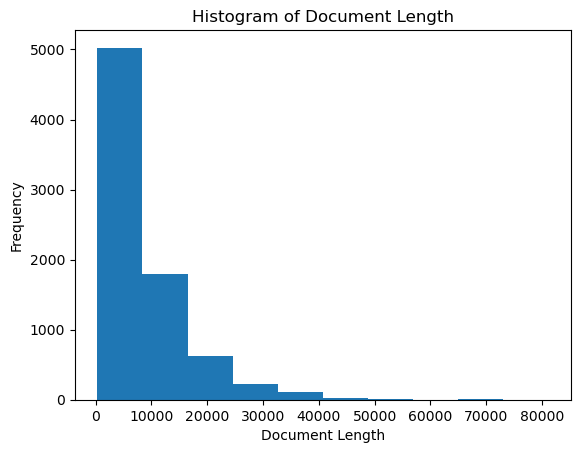

In [11]:
import matplotlib.pyplot as plt

doc_len = []
for doc in data:
    doc_len.append(len(doc['document_text'].split(" ")))

plt.hist(doc_len, bins=10)
plt.xlabel('Document Length')
plt.ylabel('Frequency')
plt.title('Histogram of Document Length')
plt.show()


In [22]:
import json

file_path = "/Volumes/Share/tran_s2/Public_Datasets/AGent/NQ_answerable_dev.json"
with open(file_path, "r") as file:
    data = json.load(file)['data']
print(len(data))

12836
